In [3]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pylab as plt
import seaborn as sns
import requests


## Check the users profile dataset

### Validate the dataset

In [4]:
user_profile_df = pd.read_csv('Churn_UsersProfile.txt', delimiter = "|", encoding='iso8859_15') #western europe encoding

user_profile_df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


#### Percentage of null values

In [3]:
user_profile_df.isnull().mean() * 100


Region_of_Origin            0.0
District_of_Origin          0.0
County_of_Origin            0.0
Period                      0.0
GenderDescription           0.0
AgeClassDescription         0.0
Average_BusUsers_per_Day    0.0
dtype: float64

**No anormalities in the values of the data. No null values**

In [4]:
for i in range(0, len(user_profile_df.columns)-1):
    col = user_profile_df.columns[i]
    print("--------"+col+"-------")
    print(np.sort(user_profile_df[col].unique()))

--------Region_of_Origin-------
['R1 - AM Lisboa' 'R2 - AM Porto']
--------District_of_Origin-------
['Aveiro' 'Lisboa' 'Porto' 'Setúbal']
--------County_of_Origin-------
['Alcochete' 'Almada' 'Amadora' 'Arouca' 'Barreiro' 'Cascais' 'Espinho'
 'Gondomar' 'Lisboa' 'Loures' 'Mafra' 'Maia' 'Matosinhos' 'Moita'
 'Montijo' 'Odivelas' 'Oeiras' 'Oliveira de Azeméis' 'Palmela' 'Paredes'
 'Porto' 'Póvoa de Varzim' 'Santa Maria da Feira' 'Santo Tirso' 'Seixal'
 'Sesimbra' 'Setúbal' 'Sintra' 'São João da Madeira' 'Trofa'
 'Vale de Cambra' 'Valongo' 'Vila Franca de Xira' 'Vila Nova de Gaia'
 'Vila do Conde']
--------Period-------
['Sep-19 to Feb-20' 'Sep-20 to Jan-21']
--------GenderDescription-------
['Female' 'Male']
--------AgeClassDescription-------
['15-24' '25-34' '35-44' '45-54' '55-64' '65+']


In [5]:
user_profile_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Average_BusUsers_per_Day
count,544.000000
mean,1165.396638
std,3842.867736
min,5.514983
25%,158.801133
50%,475.677330
75%,990.064295
max,66882.208463


In [6]:
#np.unique(user_profile_df['County_of_Origin'].values)
pd.set_option('display.max_rows', 200)
user_profile_df.groupby(['County_of_Origin', 'AgeClassDescription']).size()

County_of_Origin      AgeClassDescription
Alcochete             25-34                  1
                      35-44                  2
                      45-54                  1
                      55-64                  2
Almada                15-24                  4
                      25-34                  4
                      35-44                  4
                      45-54                  4
                      55-64                  4
                      65+                    2
Amadora               15-24                  4
                      25-34                  4
                      35-44                  4
                      45-54                  4
                      55-64                  4
                      65+                    3
Arouca                35-44                  1
Barreiro              15-24                  1
                      25-34                  3
                      35-44                  4
                  

**Not all origin counties have a complete range of ages. Vale de Cambra e São João da Madeira have only one for example** 

This is because, when computing the average for this dataset, some ranges where near 0 and also to maintain pseudo-anonymization
Full Response:

"That's right! Some counties might not have all the segments for 2 reasons: 1) Once data are average users per day, some micro segments might tend to zero; 2) for pseudo-anonymization motives. One should also remember that actual penetration of public transportation on a specific region is always determined by the offer itself. But the main purpose on these 2 tables is: 1) to get the profile of "churners", and 2) to try to explain if together with the main OD needs there are actual drivers for churn, and thus, actual recommendations to win-back churners and/or to gain new segments/customers."

### Distribuition of Average bus users

<AxesSubplot:title={'center':'Distribuition of Average bus users'}, ylabel='Frequency'>

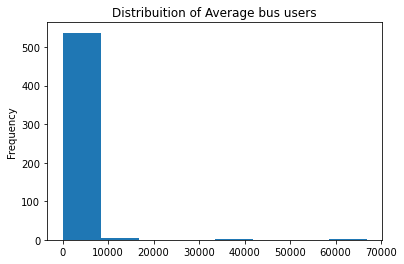

In [7]:
user_profile_df["Average_BusUsers_per_Day"].plot.hist(bins = 8, title = 'Distribuition of Average bus users')

<AxesSubplot:>

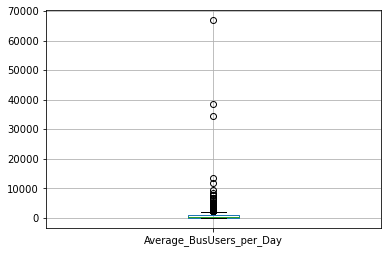

In [8]:
user_profile_df.boxplot("Average_BusUsers_per_Day")

### Amount of bus users by age range 

<AxesSubplot:xlabel='AgeClassDescription'>

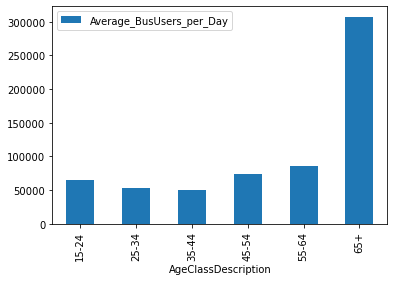

In [9]:
#user_profile_df.plot(kind='scatter', x='Average_BusUsers_per_Day', y='AgeClassDescription')
user_profile_df_age_avg = user_profile_df[['AgeClassDescription', 'Average_BusUsers_per_Day']]
user_profile_df_age_avg.groupby('AgeClassDescription').sum().plot(y='Average_BusUsers_per_Day', kind='bar')


Older people travel more (WAY more...)

<AxesSubplot:title={'center':'Counties with the most average of travelers'}, xlabel='County_of_Origin'>

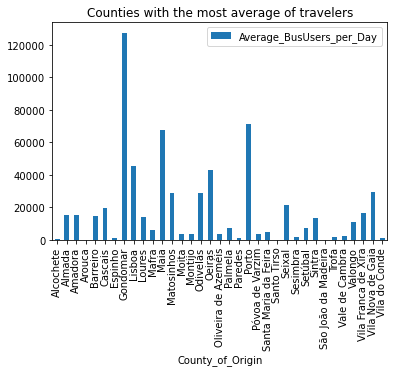

In [10]:
user_profile_df.groupby('County_of_Origin').sum().plot(y='Average_BusUsers_per_Day', kind='bar', \
            title="Counties with the most average of travelers")

### Comparing the average number of travelers by district in the 2 periods

<AxesSubplot:title={'center':'Average of total travellers in the districts between both periods'}, xlabel='Period'>

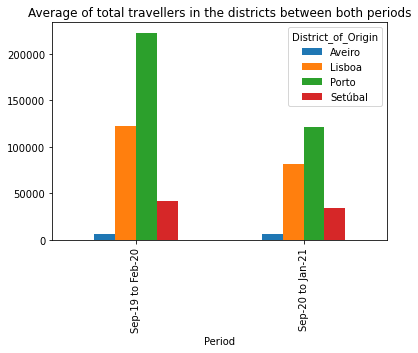

In [11]:
user_profile_df.groupby(['Period','District_of_Origin']).sum().unstack()['Average_BusUsers_per_Day']\
.plot(kind="bar", title="Average of total travellers in the districts between both periods")

**Less people travelling after covid, as expected**

### Check age of travellers in both periods

## Check the churn OD dataset

In [12]:
churn_od_df = pd.read_csv('Churn_OD.txt', delimiter = "|", encoding='iso8859_15')
churn_od_df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


In [13]:
churn_od_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
count,2253.000000,2253.000000
mean,121399.850866,0.015091
std,11942.638257,0.048366
min,110601.000000,0.000000
25%,110661.000000,0.000008
50%,111608.000000,0.000149
75%,131210.000000,0.006195
max,151005.000000,0.766823


In [14]:
churn_od_df.isnull().values.any()


False

#### Percentage of null values (0%)

In [15]:
churn_od_df.isnull().mean() * 100


Region_of_Origin                               0.0
District_of_Origin                             0.0
County_of_Origin                               0.0
Region_of_Public_Transportation                0.0
District_of_Public_Transportation              0.0
County_of_Public_Transportation                0.0
Dicofre_ParishCode_of_Public_Transportation    0.0
Demand_weight                                  0.0
dtype: float64

### Distribution of demand weights

<AxesSubplot:title={'center':'Distribuition of Demand Weight'}, ylabel='Frequency'>

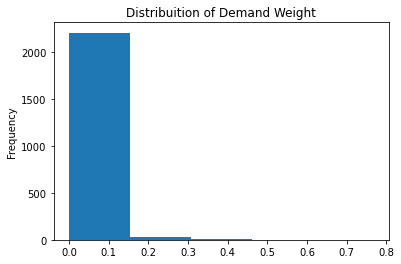

In [16]:
churn_od_df["Demand_weight"].plot.hist(bins = 5, title = 'Distribuition of Demand Weight')

<AxesSubplot:>

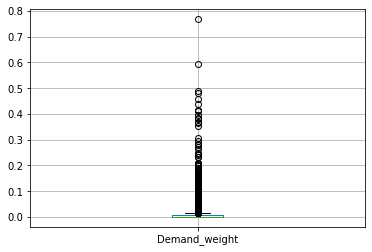

In [17]:
churn_od_df.boxplot("Demand_weight")

### Comparing the average number of traveler by district in the 2 periods

- Compare demands with age, gender, both periods
- use clustering methods to seprate data with labels (period, gender and ..). plot x = avg users; y = demand

CANT Do that, no way to see where the people went from the profile dataset...

### Analyze the geospatial data with the demand

In [18]:
zipfile = "zip://Cont_AAD_CAOP2020.zip"
parish_df = geopandas.read_file(zipfile)
parish_df["Dicofre"] = parish_df["Dicofre"].astype('str')
parish_df.head(15)

,Dicofre,Freguesia,Concelho,Distrito,TAA,Area_T_ha,Area_EA_ha,Des_Simpli,geometry
0,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.04,Sagres,"POLYGON ((-69674.530 -294276.294, -69681.011 -..."
1,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.17,Sagres,"POLYGON ((-69645.821 -294240.694, -69657.401 -..."
2,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.20,Sagres,"POLYGON ((-69720.371 -294162.995, -69715.271 -..."
3,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.09,Sagres,"POLYGON ((-70031.961 -294143.877, -70041.691 -..."
4,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.39,Sagres,"POLYGON ((-69800.002 -294108.296, -69796.762 -..."
5,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.03,Sagres,"POLYGON ((-70020.851 -294082.657, -70015.761 -..."
6,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,1.22,Sagres,"POLYGON ((-69899.552 -294063.147, -69895.842 -..."
7,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.09,Sagres,"POLYGON ((-69752.313 -293969.775, -69752.313 -..."
8,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.02,Sagres,"POLYGON ((-75949.121 -293801.236, -75953.111 -..."
9,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.91,0.04,Sagres,"POLYGON ((-69518.586 -293655.964, -69527.976 -..."


In [24]:
churn_od_with_area_df = churn_od_df  #create a new dataframe with the name of the destination parish and area


churn_od_with_area_df.rename(columns={'Dicofre_ParishCode_of_Public_Transportation': 'Dicofre'}, inplace=True)
churn_od_with_area_df["Dicofre"] = churn_od_with_area_df["Dicofre"].astype('str')
churn_od_with_area_df = pd.merge(churn_od_with_area_df,parish_df[["Dicofre","Freguesia","Area_T_ha"]],\
                                 how="inner", on=["Dicofre"])
churn_od_with_area_df.rename(columns={'Freguesia': 'parish_destination', 'Area_T_ha': 'parish_destination_area'}, inplace=True)
churn_od_with_area_df.head(20)

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre,Demand_weight,parish_destination,parish_destination_area
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,Benfica,802.49
1,R1 - AM Lisboa,Lisboa,Cascais,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.068546,Benfica,802.49
2,R1 - AM Lisboa,Lisboa,Lisboa,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.039357,Benfica,802.49
3,R1 - AM Lisboa,Lisboa,Loures,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.016486,Benfica,802.49
4,R1 - AM Lisboa,Lisboa,Mafra,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.033026,Benfica,802.49
5,R1 - AM Lisboa,Lisboa,Odivelas,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.067301,Benfica,802.49
6,R1 - AM Lisboa,Lisboa,Oeiras,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.063808,Benfica,802.49
7,R1 - AM Lisboa,Lisboa,Sintra,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.076509,Benfica,802.49
8,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.020385,Benfica,802.49
9,R1 - AM Lisboa,Setúbal,Alcochete,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.592367,Benfica,802.49


In [19]:
churn_od_with_area_df.plot.scatter(x = 'Area_T_ha', y = 'Demand_weight',
                  color = 'sandybrown', title = 'Demand weight vs  Area of destination')

NameError: name 'churn_od_with_area_df' is not defined

### Analyze the geospatial data with the user profiles

In [20]:
user_profile_with_area_df = user_profile_df  #create a new dataframe with the area of the origin

parish_df.rename(columns={'Freguesia': 'County_of_Origin'}, inplace=True)
user_profile_with_area_df = pd.merge(user_profile_with_area_df,parish_df[["County_of_Origin","Area_T_ha"]],\
                                 how="inner", on=["County_of_Origin"])
#user_profile_with_area_df.rename(columns={'Freguesia': 'parish_destination', 'Area_T_ha': 'parish_destination_area'}, inplace=True)
user_profile_with_area_df.head(15)

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Area_T_ha
0,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,15-24,2529.941678,3281.5
1,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,25-34,866.086815,3281.5
2,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,35-44,817.834735,3281.5
3,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,45-54,292.304178,3281.5
4,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,55-64,264.211066,3281.5
5,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,65+,147.474840,3281.5
6,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Male,15-24,115.773418,3281.5
7,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Male,25-34,117.599576,3281.5
8,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Male,35-44,452.760878,3281.5
9,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Male,45-54,774.207928,3281.5


<AxesSubplot:title={'center':'Averge users per day vs  Area of destination'}, xlabel='Area_T_ha', ylabel='Average_BusUsers_per_Day'>

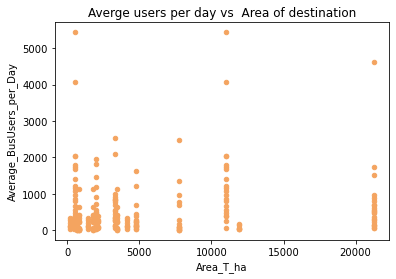

In [21]:
user_profile_with_area_df.plot.scatter(x = 'Area_T_ha', y = 'Average_BusUsers_per_Day',
                  color = 'sandybrown', title = 'Average users per day vs  Area of destination')

In [19]:
conversion_dic= {
    "Porto": "Porto",
    "Aveiro": "Aveiro",
    "Lisboa": "Lisbon",
    "Setúbal": "Setubal"
}

def get_lat_lon(district_name, city_name):
    print("Retrieving Lat and Long of {0} ({1})...".format(city_name, district_name))

    # If no city name is available then use district instead
    if city_name in conversion_dic:
        city_name=conversion_dic[city_name]
    
    url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city_name + "&appid=155b4d6acbf49ae8044c54f654953578"

    request_json=requests.get(url).json()
    if len(request_json)==0:
        return get_history(district_name, district_name)
        
    return (request_json[0]["lat"], request_json[0]["lon"])


def get_air_polution(lat, lon, metric):
    print("Retrieving {0} ({1}) air polution...".format(lat, lon))
    
    url = "http://api.openweathermap.org/data/2.5/air_pollution?lat={0}&lon={1}&appid=155b4d6acbf49ae8044c54f654953578".format(lat, lon)

    request_json=requests.get(url).json()
        
    if metric==None:
        return request_json["list"][0]["main"]["aqi"]
    else:
        return request_json["list"][0]["components"][metric]
    

def get_air_polution_by_city(district_name, city_name, metric):
    lat_lon = get_lat_lon(district_name, city_name)
    print(lat_lon)
    return get_air_polution(lat_lon[0], lat_lon[1], metric)


def get_history(district_name, city_name, month_num):
    print("Retrieving {0} ({1}) history, month {2}...".format(city_name, district_name, month_num))

    # If no city name is available then use district instead
    if city_name in conversion_dic:
        city_name=conversion_dic[city_name]
    
    url = "http://history.openweathermap.org/data/2.5/aggregated/month?q="+ city_name + ",PT&month="+month_num+"&appid=155b4d6acbf49ae8044c54f654953578"
    request_json=requests.get(url).json()
    if "result" not in request_json:
        return get_history(district_name, district_name, month_num)
        
    return pd.json_normalize(request_json["result"])

def get_agg_metric(district, city, col, agg_metric):
    df=get_mean_history_weather(district, city)
    return df.agg({col: agg_metric})[0]

In [48]:
start_date = "1598918400" #1 september 2020
end_date = "1612051200" #31 jan 2021
aveiro_weather=get_history("Aveiro", "Aveiro", "9")
aveiro_weather.head(50)

Retrieving Aveiro (Aveiro) history...
Index(['month', 'sunshine_hours', 'temp.record_min', 'temp.record_max',
       'temp.average_min', 'temp.average_max', 'temp.median', 'temp.mean',
       'temp.p25', 'temp.p75', 'temp.st_dev', 'temp.num', 'pressure.min',
       'pressure.max', 'pressure.median', 'pressure.mean', 'pressure.p25',
       'pressure.p75', 'pressure.st_dev', 'pressure.num', 'humidity.min',
       'humidity.max', 'humidity.median', 'humidity.mean', 'humidity.p25',
       'humidity.p75', 'humidity.st_dev', 'humidity.num', 'wind.min',
       'wind.max', 'wind.median', 'wind.mean', 'wind.p25', 'wind.p75',
       'wind.st_dev', 'wind.num', 'precipitation.min', 'precipitation.max',
       'precipitation.median', 'precipitation.mean', 'precipitation.p25',
       'precipitation.p75', 'precipitation.st_dev', 'precipitation.num',
       'clouds.min', 'clouds.max', 'clouds.median', 'clouds.mean',
       'clouds.p25', 'clouds.p75', 'clouds.st_dev', 'clouds.num'],
      dtype='object

,month,sunshine_hours,temp.record_min,temp.record_max,temp.average_min,temp.average_max,temp.median,temp.mean,temp.p25,temp.p75,...,precipitation.st_dev,precipitation.num,clouds.min,clouds.max,clouds.median,clouds.mean,clouds.p25,clouds.p75,clouds.st_dev,clouds.num
0,9,181.38,279.39,307.46,282.63,304.4,291.15,291.55,288.67,294.15,...,0.55,5760,0,100,8,29.47,0,68,35.61,5760


In [27]:
#unique_cities = user_profile_with_area_df["County_of_Origin"].unique()
unique_cities = user_profile_df[['District_of_Origin','County_of_Origin']].drop_duplicates()
cities_tuples = [tuple(r) for r in unique_cities.to_numpy()] #all different combinations of district,city

def get_mean_history_weather(cities_tuples):

    #check period between sep 2020 - jan 2021
    month_nums = [9, 10, 11, 12, 1]
    weather_df = pd.DataFrame()
    for district,city in cities_tuples:
        weather_city = pd.DataFrame()
        for month_num in month_nums:
            weather=get_history(district, city, str(month_num))
            weather = weather[["sunshine_hours", "temp.mean", "humidity.mean", "wind.mean", "precipitation.mean"]]
            weather['District_of_Origin'] = district
            weather['County_of_Origin'] = city
            weather_city = pd.concat([weather_df, weather], axis=0)
        df = weather_city.groupby(['District_of_Origin', 'County_of_Origin']).agg({'sunshine_hours': 'mean',\
            'humidity.mean': 'mean', 'temp.mean': 'mean', 'wind.mean': 'mean', 'precipitation.mean': 'mean'})
        weather_df = pd.concat([weather_df, df])
    #air pollution
    weather_df['CO2Concentration'] = weather_df.apply(lambda row: get_air_polution_by_city(row.name[0],\
        row.name[1], "co"), axis=1)
    weather_df['pm2_5Concentration'] = weather_df.apply(lambda row: get_air_polution_by_city(row.name[0],\
        row.name[1], "pm2_5"), axis=1)
    weather_df['pm10Concentration'] = weather_df.apply(lambda row: get_air_polution_by_city(row.name[0],\
        row.name[1], "pm10"), axis=1)
    weather_df['AirQuality'] = weather_df.apply(lambda row: get_air_polution_by_city(row.name[0],\
        row.name[1], None), axis=1)
    return weather_df


weather_df = get_mean_history_weather(cities_tuples)
weather_df.head(45)


Retrieving Amadora (Lisboa) history, month 9...
Retrieving Amadora (Lisboa) history, month 10...
Retrieving Amadora (Lisboa) history, month 11...
Retrieving Amadora (Lisboa) history, month 12...
Retrieving Amadora (Lisboa) history, month 1...
Retrieving Cascais (Lisboa) history, month 9...
Retrieving Cascais (Lisboa) history, month 10...
Retrieving Cascais (Lisboa) history, month 11...
Retrieving Cascais (Lisboa) history, month 12...
Retrieving Cascais (Lisboa) history, month 1...
Retrieving Lisboa (Lisboa) history, month 9...
Retrieving Lisboa (Lisboa) history, month 10...
Retrieving Lisboa (Lisboa) history, month 11...
Retrieving Lisboa (Lisboa) history, month 12...
Retrieving Lisboa (Lisboa) history, month 1...
Retrieving Loures (Lisboa) history, month 9...
Retrieving Loures (Lisboa) history, month 10...
Retrieving Loures (Lisboa) history, month 11...
Retrieving Loures (Lisboa) history, month 12...
Retrieving Loures (Lisboa) history, month 1...
Retrieving Mafra (Lisboa) history, mon

Retrieving Póvoa de Varzim (Porto) history, month 12...
Retrieving Porto (Porto) history, month 12...
Retrieving Póvoa de Varzim (Porto) history, month 1...
Retrieving Porto (Porto) history, month 1...
Retrieving Santo Tirso (Porto) history, month 9...
Retrieving Porto (Porto) history, month 9...
Retrieving Santo Tirso (Porto) history, month 10...
Retrieving Porto (Porto) history, month 10...
Retrieving Santo Tirso (Porto) history, month 11...
Retrieving Porto (Porto) history, month 11...
Retrieving Santo Tirso (Porto) history, month 12...
Retrieving Porto (Porto) history, month 12...
Retrieving Santo Tirso (Porto) history, month 1...
Retrieving Porto (Porto) history, month 1...
Retrieving Trofa (Porto) history, month 9...
Retrieving Porto (Porto) history, month 9...
Retrieving Trofa (Porto) history, month 10...
Retrieving Porto (Porto) history, month 10...
Retrieving Trofa (Porto) history, month 11...
Retrieving Porto (Porto) history, month 11...
Retrieving Trofa (Porto) history, mont

(38.801, -9.3783)
Retrieving 38.801 (-9.3783) air polution...
Retrieving Lat and Long of Vila Franca de Xira (Lisboa)...
(38.9553, -8.9897)
Retrieving 38.9553 (-8.9897) air polution...
Retrieving Lat and Long of Alcochete (Setúbal)...
(38.7553, -8.9609)
Retrieving 38.7553 (-8.9609) air polution...
Retrieving Lat and Long of Almada (Setúbal)...
(38.679, -9.1569)
Retrieving 38.679 (-9.1569) air polution...
Retrieving Lat and Long of Barreiro (Setúbal)...
(38.6631, -9.0724)
Retrieving 38.6631 (-9.0724) air polution...
Retrieving Lat and Long of Moita (Setúbal)...
(38.6508, -8.9904)
Retrieving 38.6508 (-8.9904) air polution...
Retrieving Lat and Long of Montijo (Setúbal)...
(38.7067, -8.9739)
Retrieving 38.7067 (-8.9739) air polution...
Retrieving Lat and Long of Palmela (Setúbal)...
(38.569, -8.9013)
Retrieving 38.569 (-8.9013) air polution...
Retrieving Lat and Long of Seixal (Setúbal)...
(38.6117, -9.1037)
Retrieving 38.6117 (-9.1037) air polution...
Retrieving Lat and Long of Sesimbra 

Retrieving Lat and Long of Almada (Setúbal)...
(38.679, -9.1569)
Retrieving 38.679 (-9.1569) air polution...
Retrieving Lat and Long of Barreiro (Setúbal)...
(38.6631, -9.0724)
Retrieving 38.6631 (-9.0724) air polution...
Retrieving Lat and Long of Moita (Setúbal)...
(38.6508, -8.9904)
Retrieving 38.6508 (-8.9904) air polution...
Retrieving Lat and Long of Montijo (Setúbal)...
(38.7067, -8.9739)
Retrieving 38.7067 (-8.9739) air polution...
Retrieving Lat and Long of Palmela (Setúbal)...
(38.569, -8.9013)
Retrieving 38.569 (-8.9013) air polution...
Retrieving Lat and Long of Seixal (Setúbal)...
(38.6117, -9.1037)
Retrieving 38.6117 (-9.1037) air polution...
Retrieving Lat and Long of Sesimbra (Setúbal)...
(38.4445, -9.1015)
Retrieving 38.4445 (-9.1015) air polution...
Retrieving Lat and Long of Setúbal (Setúbal)...
(38.5244, -8.8882)
Retrieving 38.5244 (-8.8882) air polution...
Retrieving Lat and Long of Espinho (Aveiro)...
(41.0076, -8.6413)
Retrieving 41.0076 (-8.6413) air polution...

sunshine_hours  humidity.mean  \
District_of_Origin County_of_Origin                                      
Lisboa             Amadora                        74.44          84.09   
                   Cascais                        71.22          80.94   
                   Lisboa                         74.33          84.22   
                   Loures                         74.33          84.13   
                   Mafra                          71.67          80.35   
                   Odivelas                       71.33          83.21   
                   Oeiras                         74.33          84.22   
                   Sintra                         69.56          81.32   
                   Vila Franca de Xira            64.33          83.53   
Setúbal            Alcochete                      77.56          84.04   
                   Almada                         73.44          82.54   
                   Barreiro                       76.89          84.20   
                   Moita                          78.44          84.14   
                   Montijo                        76.89          84.21   
                   Palmela                        78.11          84.28   
                   Seixal                         79.44          84.49   
                   Sesimbra                       77.22          84.14   
                   Setúbal                        79.44          84.49   
Aveiro             Espinho                        94.67          85.50   
                   Oliveira de Azeméis            94.67          85.50   
                   Santa Maria da Feira           94.67          85.50   
Porto              Gondomar                       97.56          84.88   
                   Maia                           93.78          84.91   
                   Matosinhos                     94.56          84.89   
                   Paredes                        94.33          85.11   
                   Porto                          94.33          85.11   
                   Póvoa de Varzim                94.33          85.11   
                   Santo Tirso                    94.33          85.11   
                   Trofa                          94.33          85.11   
                   Valongo                        96.44          84.88   
                   Vila do Conde                  91.56          86.52   
                   Vila Nova de Gaia              95.00          85.10   
Aveiro             Arouca                         94.67          85.50   
                   São João da Madeira            94.67          85.50   
                   Vale de Cambra                 94.67          85.50   

                                         temp.mean  wind.mean  \
District_of_Origin County_of_Origin                             
Lisboa             Amadora                  283.64       4.20   
                   Cascais                  284.31       4.56   
                   Lisboa                   283.75       4.23   
                   Loures                   283.56       4.19   
                   Mafra                    284.44       5.02   
                   Odivelas                 283.06       3.85   
                   Oeiras                   283.75       4.23   
                   Sintra                   283.79       4.46   
                   Vila Franca de Xira      282.99       4.11   
Setúbal            Alcochete                283.30       3.80   
                   Almada                   283.66       4.14   
                   Barreiro                 283.72       4.19   
                   Moita                    283.80       4.04   
                   Montijo                  283.43       3.97   
                   Palmela                  283.81       4.08   
                   Seixal                   283.76       3.99   
                   Sesimbra                 284.06       4.23   
                   Setúbal                  283.76       3.99   
Av

In [46]:
#keep only the period of sep 20-jan 21 for weather analysis, because we only have 1 year of historical weather data
user_profile_SepJan_df = user_profile_df.loc[user_profile_df['Period'] == 'Sep-20 to Jan-21']

profile_weather_df = pd.merge(left=user_profile_SepJan_df, right=weather_df, how='left', left_on='County_of_Origin', right_on='County_of_Origin')
profile_weather_df = profile_weather_df[profile_weather_df.Average_BusUsers_per_Day <= 34406.417961]
#profile_weather_df.describe()
profile_weather_df

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,sunshine_hours,humidity.mean,temp.mean,wind.mean,precipitation.mean,CO2Concentration,pm2_5Concentration,pm10Concentration,AirQuality
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-20 to Jan-21,Female,15-24,536.005174,74.44,84.09,283.64,4.2,0.09,195.27,10.66,26.93,2
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-20 to Jan-21,Female,25-34,408.068335,74.44,84.09,283.64,4.2,0.09,195.27,10.66,26.93,2
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-20 to Jan-21,Female,35-44,478.337192,74.44,84.09,283.64,4.2,0.09,195.27,10.66,26.93,2
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-20 to Jan-21,Female,45-54,571.192813,74.44,84.09,283.64,4.2,0.09,195.27,10.66,26.93,2
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-20 to Jan-21,Female,55-64,741.072367,74.44,84.09,283.64,4.2,0.09,195.27,10.66,26.93,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,15-24,4452.188395,95.00,85.10,282.36,3.2,0.17,206.95,9.57,14.54,2
285,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,25-34,363.461965,95.00,85.10,282.36,3.2,0.17,206.95,9.57,14.54,2
286,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,35-44,214.023515,95.00,85.10,282.36,3.2,0.17,206.95,9.57,14.54,2
287,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763,95.00,85.10,282.36,3.2,0.17,206.95,9.57,14.54,2


<AxesSubplot:>

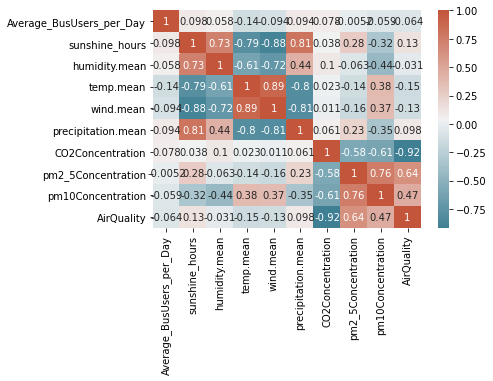

In [47]:
corr = profile_weather_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

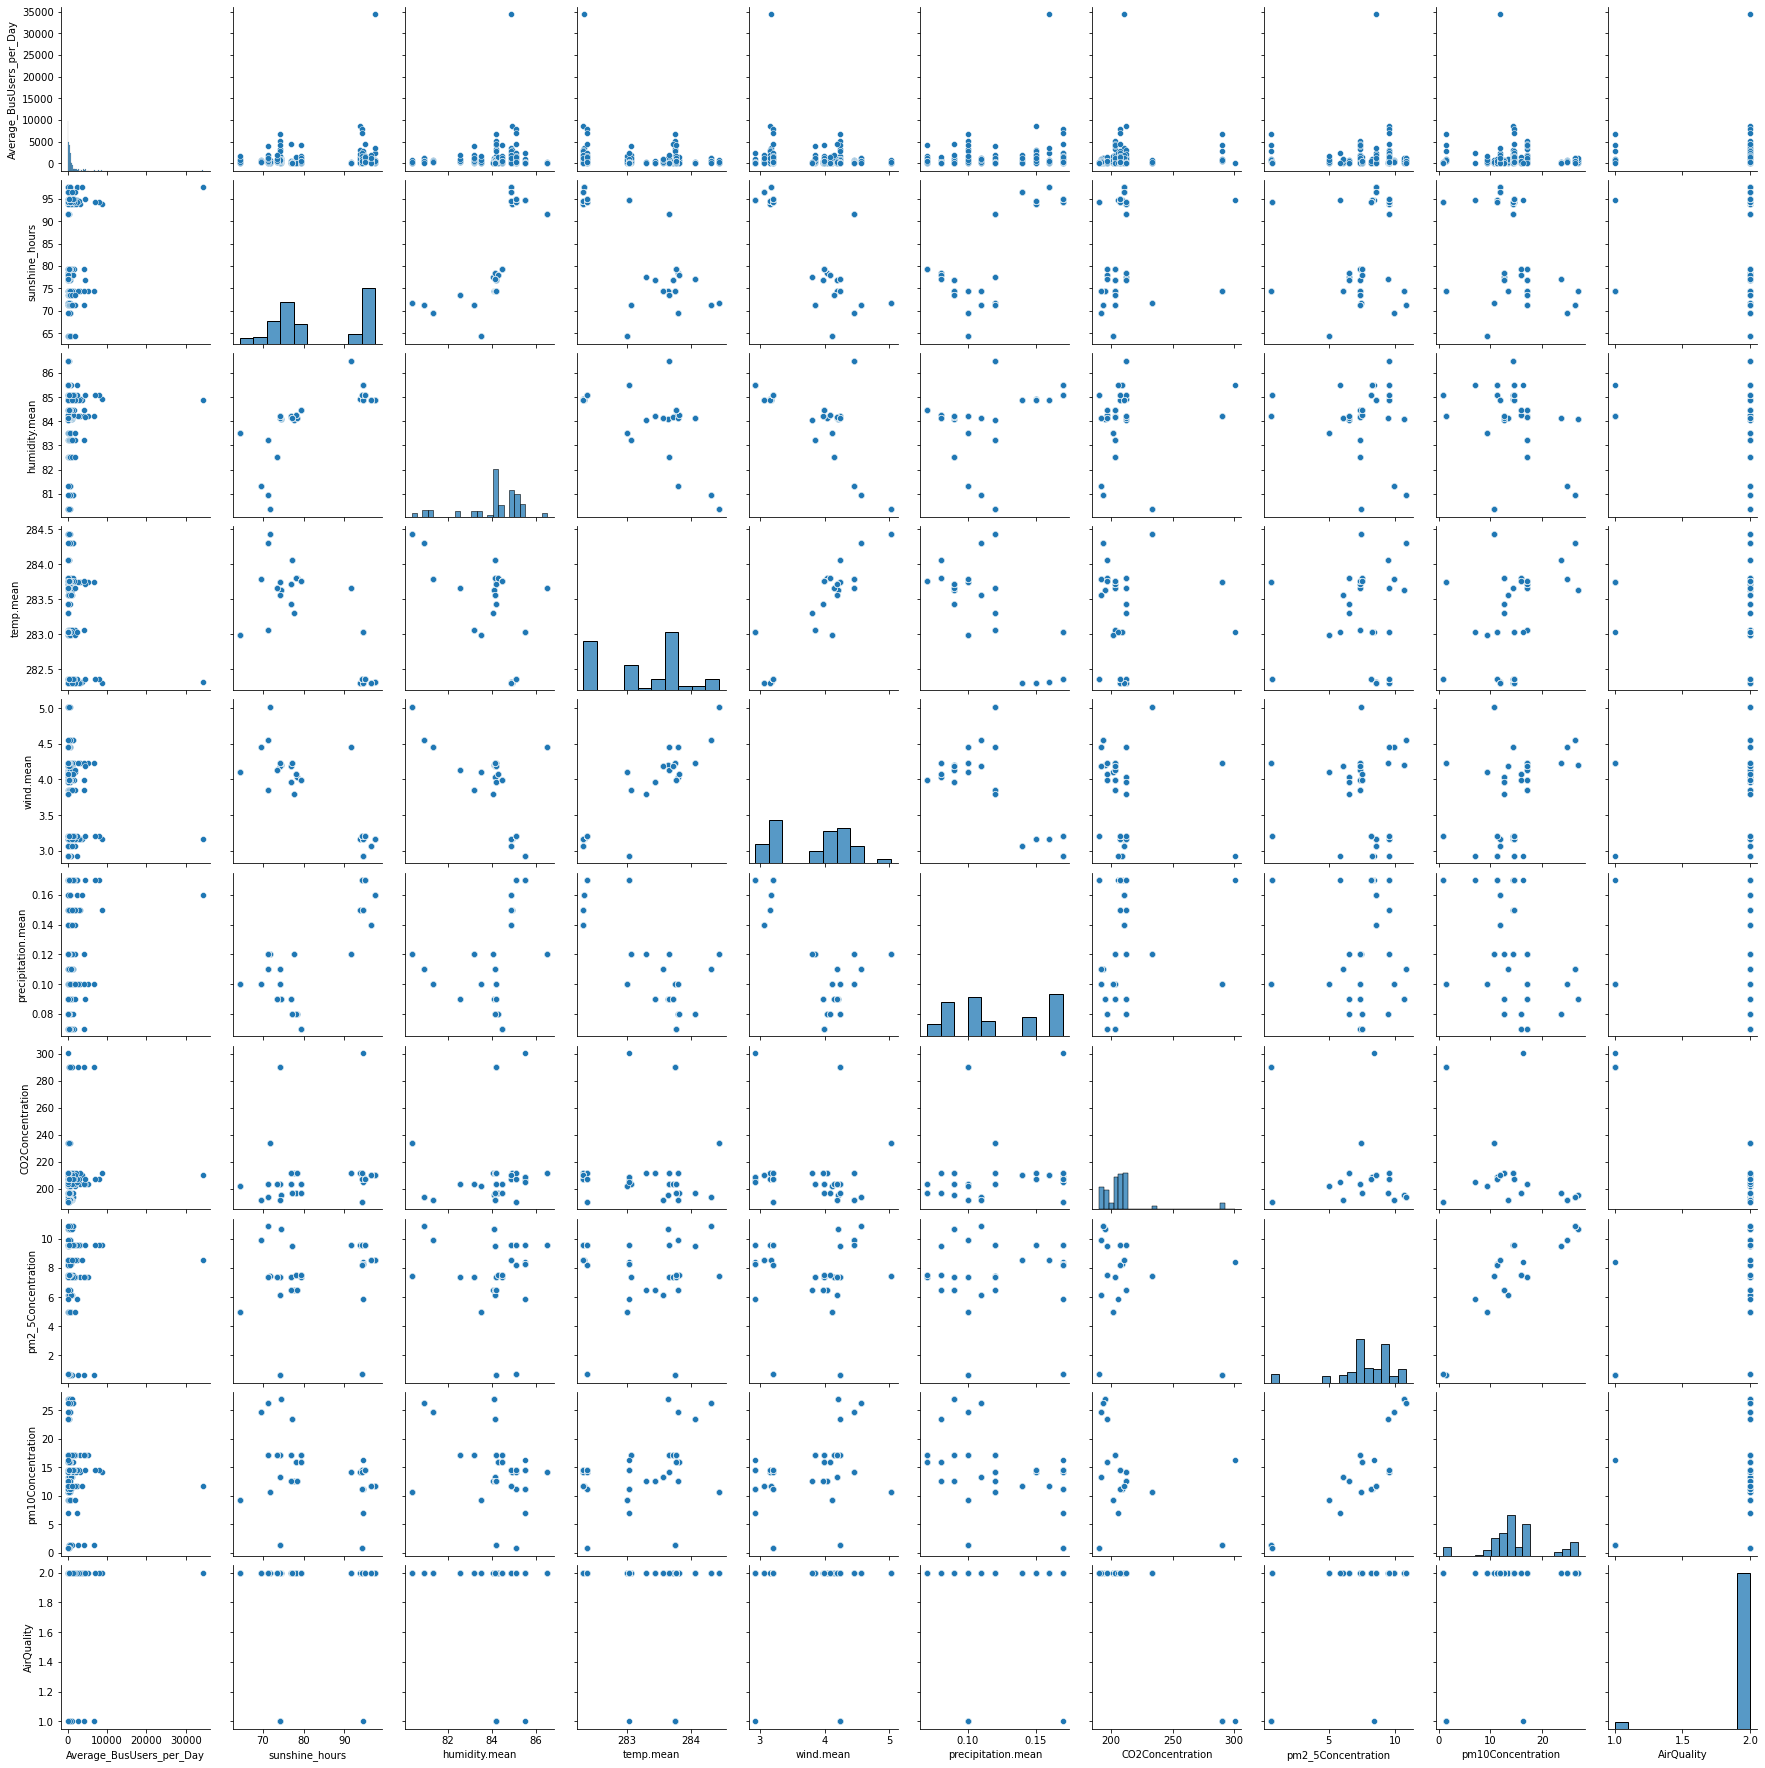

In [48]:
sns.pairplot(profile_weather_df)
